In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [2]:
df= pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape
#show the number of rows and columns

(13320, 9)

## Cleaning Data

In [4]:
df.groupby("area_type")["area_type"].agg("count")

#will display different categories in area_type column and count each category 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#for the sake of model simpi;icty i will drop the following column features area_typ, availability ,society	,balcony	

df=df.drop(['area_type','availability' ,'society','balcony'],axis='columns')
df.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#start cleaning data 
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df=df.dropna()
df.isnull().sum()
# another way to handle na values is to take  median of all bathsrooms in exampleand fill the 73 columns with them ,
#but here we have huge number of rows so we can savely drop them

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
# check the non numeric data 
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#make colume for each unique value in the column size with only the number brfore bhk value ex: '2 BHK' take only 2 "tokanize func" split 
#and take the first value 
df['bhk']=df['size'].apply(lambda x: int(x.split(" ")[0]))

In [10]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df[df.bhk>20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


**In the previous there is an error which is total_sqft can't 2400 for 43 Bedroom.**

In [13]:
#Some times as we see in the following that total_sqft has a range value replace them by average of two values ex: '1133 - 1384'
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
#lets know what type of variation in cilumn total_sqft we can do this by exploring if the value is floot or not
#if the value isn't a valid value will return false

def is_float(x):
    try:
        float(x)
    except:
        return False
    return  True

In [15]:
df[~df['total_sqft'].apply(is_float)].head(10)
# "~" to return the false values which indicates the  

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


## problems in data such that they contain:
- Unstructured data
- not uniform data (such in previous) "ex: 34.46Sq. Meter and 34.46Sq. Meter	"
- data errors
- outliers


In [16]:
# write func that take range as an input and return the average function 
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        #if normal value 
        return float(x)
    except:
        return None
        

In [17]:
#convert normal number to float 
convert_sqft_to_num('299')

299.0

In [18]:
convert_sqft_to_num('1195 - 1440') #return average of two values

1317.5

In [19]:
convert_sqft_to_num('4125Perch	') # will return nothing

In [20]:
# apply convert_sqft_to_num to required 
df2=df.copy()
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [21]:
df.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

**total_sqft    2100 - 2850  is range before changes**

In [22]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

**total_sqft   2475.0:  this chnaged here into float instead of range**


In [23]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

# Feature Engineeringh & Dimenstionality Reduction:

In [24]:
# work on df.3
df3=df2.copy()

In [25]:
#price per feet column unlike date d2 has a total sqft col and total proce col
#this will help in outlier detection and removal in later stage 
#price is in lak rupees "currancy in hindian"
df3['price_per_sqft']=(df3['price']*100000)/df3['total_sqft']

In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


- **Explore location column and see how many location are there and how many rows are avilable in data(location)**
- **location is a categorical data as its a text, and if we have too many locations this will create a problem**

In [27]:
 len(df3['location'].unique())

1304

## Dimenstionality Curse / Reduction "High Dimenstionality Problem"
- **Usually to handle categorical data we convert them into dummy columns using one hot encoding**
- **if we keep all the locations we will have many columns like 1300 which are too much**
- **Effective technique to solve is to com up with other category; meaning that when we have this huge number of data we get 2 or 3 row for come location"**

In [28]:
#stripped any estra space in locations : "used to strip leading and trailing whitespaces from each element."

df3.location=df3.location.apply( lambda x: x.strip())
location_state=df3.groupby('location')['location'].agg('count').sort_values(ascending=False) #return how many rows per each location
location_state

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

**As we can see in the previous some locations has sonly one row, so it is better to exclude them as they will not have much effect**

In [29]:
# remove them by threshold : remove any location that have less than 10 data point, but first know the number of them (location is series dtype)

len(location_state[location_state<=10])

1052

In [30]:
location_state_less_than_10 =location_state[location_state<=10]
location_state_less_than_10 

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
#put them in general  category called other category

In [32]:
len(df3.location.unique())

1293

In [33]:
df3.location=df3.location.apply(lambda x:'other' if x in location_state_less_than_10 else x)

In [34]:
len(df3.location.unique())
#notice changing in number

242

In [35]:
df3.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection and Removal
**Some Technique to detect them**
- Standard Deviation
- Domain knowledge

In [36]:
#ex of outlier that could be here: not logic that appartment with 2 Bathrooms to be 500 sqft in total area"
# so we will look to any data rows that where the sqrt foot poor bedrooms is less than some threshold "not logic data" (know this from buiness description )
#assume that 300 is threshold for space per each room 


In [37]:
df3.shape

(13246, 7)

In [38]:
df3[df3.total_sqft/df3.bhk<=300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
#return all data that have valid total size
df4 =df3[~(df3.total_sqft/df3.bhk<=300)]
df4.shape

(12320, 7)

The previous is one method criteria for removing outlier

In [40]:
df4.price_per_sqft.describe()
#In general we assume a dataset has a normal distribution then most of data points around 68% of data should lie btween mean and  one standard deviation 

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

from the previous we see that max and min values aren't logic and we 
consider them outliers so we need to handle them to make a general model with normal standard deviation 

In [41]:
# func will remove price_per_square outliers "locations" want to do this for per location but first find the mean and standard deviation 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape


(10016, 7)

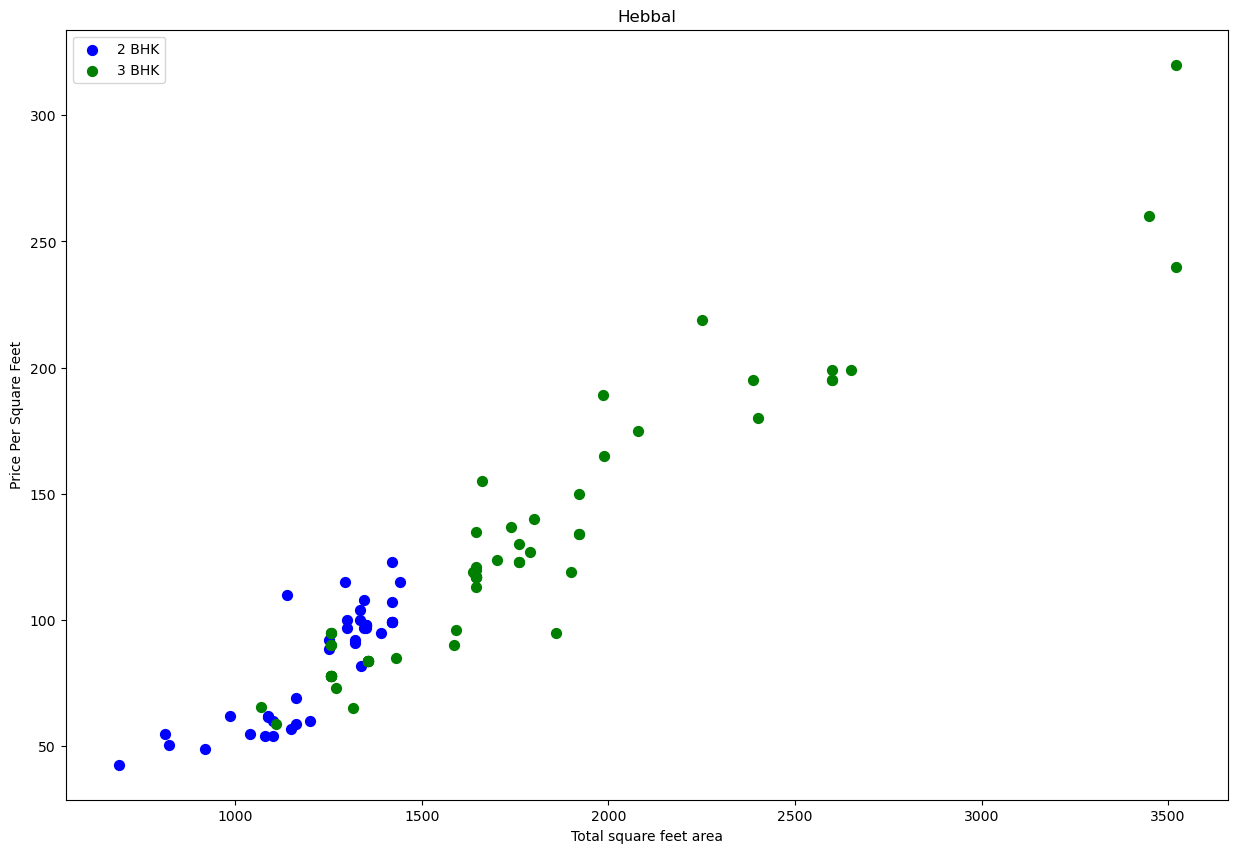

In [42]:

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    # Use 'total_sqft' as x-axis instead of entire DataFrame
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total square feet area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

# Assuming df5 is your DataFrame
plot_scatter_chart(df5, "Hebbal")


**we should also remove properities where for same location, the price (for example) 3 bedroom appartment is less than 2 bedroom apartment (with same square ft area.)
    what we will do is for a given location, we will build a dictionary of stats per bhk,i.e.** <br>
    
    ex:
    {
    '1': {
        'mean':4000,
        'std' :2000,
        'count':34
    },
    '2': {
        'mean':4300,
        'std' :2300,
        'count':22
    },
    }
**Now we can remove those 2 BHK apartnments whose price_per_sqft is less than mean price_per_sqft of 1 BHK appartment**

In [43]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk - 1)
                if stats and stats['count'] > 5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df6 = remove_bhk_outlier(df5)
df6.shape


(7164, 7)

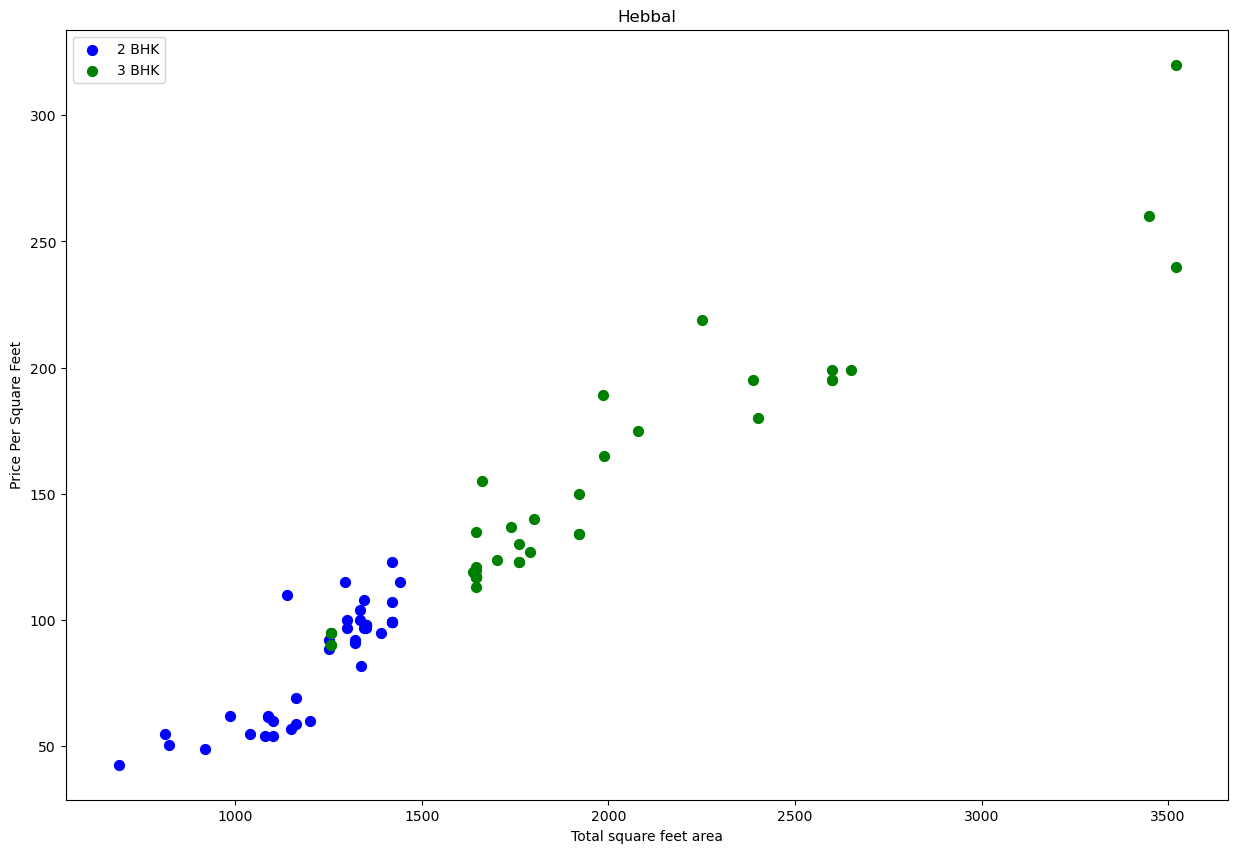

In [44]:

plot_scatter_chart(df6, "Hebbal")


**we will notice that green dots between 1000 and 1500 are gone as a result of cleaning**

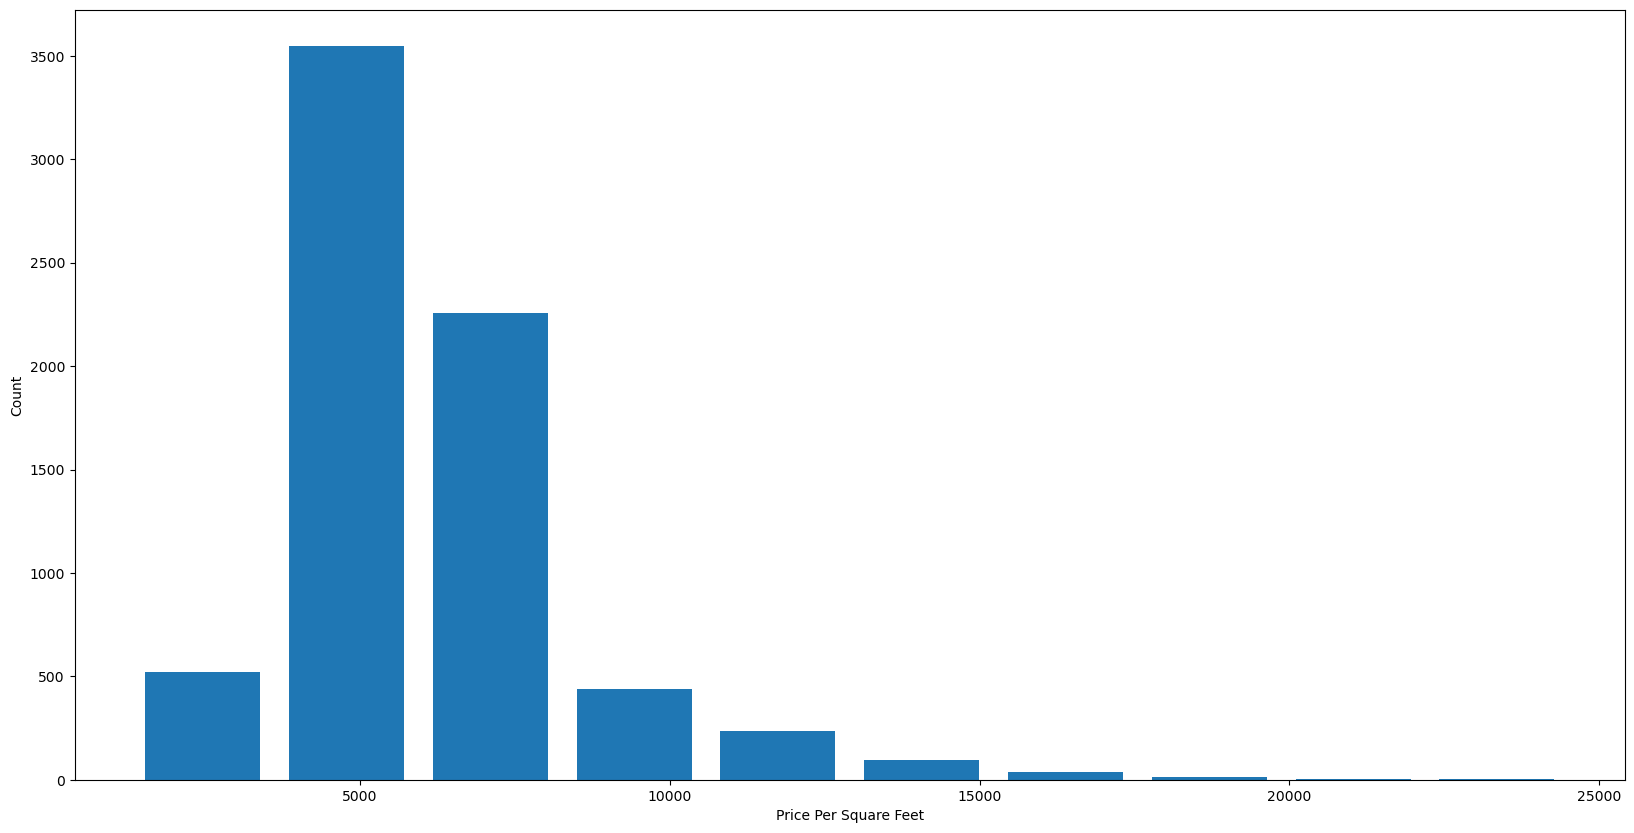

In [45]:

matplotlib.rcParams['figure.figsize'] = (20, 10)

# Assuming df6 is your DataFrame
plt.hist(df6.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()


In [46]:
# show number of data points in each category and then data set has a normal distribution so far –––– 

In [47]:
df6.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk
938,5th Phase JP Nagar,9 Bedroom,1260,11.0,290.0,9
1078,BTM 1st Stage,9 Bedroom,3300,14.0,500.0,9
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
1953,KR Puram,8 Bedroom,1200,12.0,110.0,8
1979,Hongasandra,8 Bedroom,990,12.0,120.0,8
3096,Jp nagar 8th Phase .,10 BHK,12000,12.0,525.0,10
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Text(0, 0.5, 'Count')

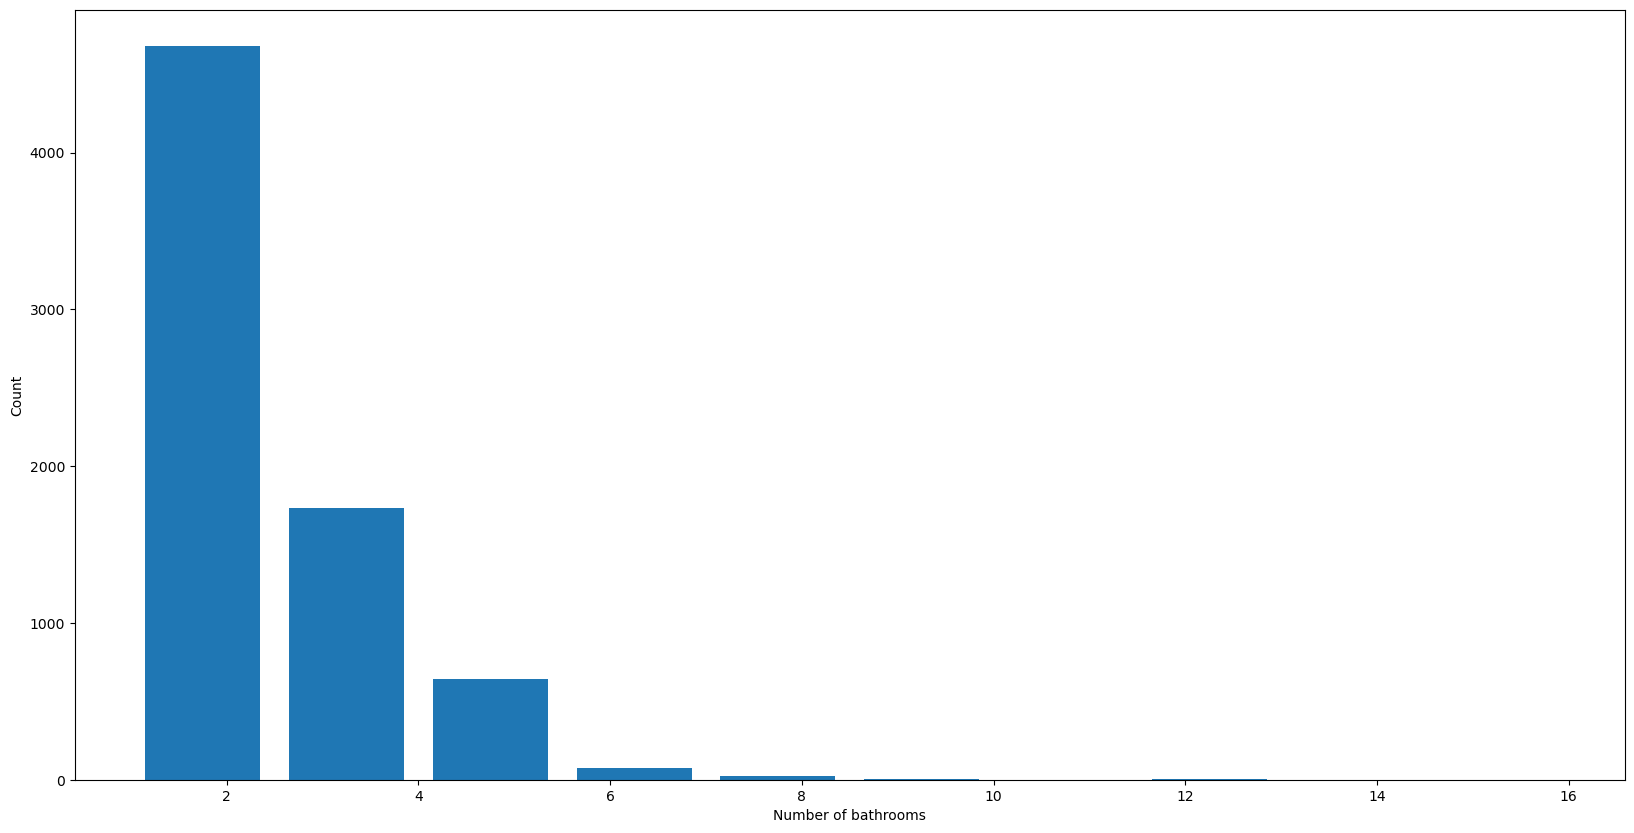

In [49]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

**We have some outliers more than 3 and 4 bathrooms**

In [50]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8232,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df6=df6[df6.bath<df6.bhk+2]
df6.shape

(7088, 7)

In [52]:
df7=df6.drop(['size','price_per_sqft'],axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


### Use One Hot Encoding For Location 

In [53]:
#convert location into numeric column because ml don't accept text by one hot encoded 
dummies = pd.get_dummies(df7['location']).astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#append this to data dummies and df7 to df8 new data frame 
df8=pd.concat([df7,dummies.drop('other',axis='columns' )],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df9=df8.drop('location',axis='columns')
df9.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building 

## Data pipelining 
Creating df1,df2,df3 is a type of pipeline

In [56]:
df9.shape

(7088, 245)

In [57]:
# drop price because we gonna predict it 
x=df9.drop('price', axis='columns') 
x.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
x.shape

(7088, 244)

In [59]:
y=df9.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [60]:
len(y)

7088

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)   #score of the model tell you how good the model is 


0.8751466170466231

## K-Fold Cross Validation To Measure Accuracy of LinearRegression Model
 

The main purpose of this code is to perform cross-validation using the ShuffleSplit strategy 
with a total of 5 splits and a test set size of 20%. It evaluates the performance of a linear 
regression model (LinearRegression()) using the cross_val_score function. Cross-validation helps assess 
how well a model generalizes to new data by training and testing on different subsets of the dataset.

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)


array([0.86195477, 0.86419585, 0.82068946, 0.82709117, 0.89136565])

**We can see in the 5 iterations we get a score above 80%, this is good but also we want to check few other algorithms to know whether we could get more than this**<br>
**score or nor, so we will use GridSearchCV for this purpose.**

## Find Best Model Using GridSearchCV

Try different algo and determine which regression algo other than linear regression (such as lasso & decision tree ) wi ll fits with my data 

In [64]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'Linear_Regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False], 'positive': [True, False]}
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
         })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming x and y are defined somewhere before this function call
find_best_model_using_gridsearchcv(x, y)


/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(

,model,best_score,best_params
0,Linear_Regression,0.853059,"{'fit_intercept': True, 'positive': False}"
1,Lasso,0.706936,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.767061,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on the above values for score we can say safely that LinearRegression gives the best score.Hence we will use it**

In [65]:
x.columns


Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [66]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]
#so each location has its own column


5

In [67]:
def predict_price(location, sqft, bath, bhk, x):    
    loc_index = np.where(x.columns == location)[0][0]
 
    input_data = np.zeros(len(x.columns))
    input_data[0] = sqft
    input_data[1] = bath
    input_data[2] = bhk
    
    if loc_index >= 0:
        input_data[loc_index] = 1

    return lr_clf.predict([input_data])[0]



In [68]:
predict_price('1st Phase JP Nagar',1000,2,2,x)

/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.85157743670386

In [69]:
predict_price('1st Phase JP Nagar',1000,3,3,x)

/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.10221112870182

In [70]:
predict_price('Indira Nagar',1000, 3, 3,x)



/Users/ayasamir/miniforge3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.0122410211823

## Export the tested model to a pickle file


In [71]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f) 

In [72]:
import json

with open("columns.json", "w") as f:
    f.write(json.dumps(x.columns.tolist()))

In [73]:
#writing python flash server 